In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import re

##### Read features as dataframes

In [2]:
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [3]:
region_en = 'huadong'

In [4]:
# import the points with image values 
feature_df = [pd.read_csv(f'./Data/Training_sample_{region_en}_{year}.csv') for year in year_range]

# merge all pt_with_img and remove unnecessary columns
feature_df = [fe.drop(['system:index','.geo'],axis=1) for fe in feature_df]

##### train_test_split and apply randomforest_classifier

In [5]:
Sample_acc = {}

for year,fe in zip(year_range,feature_df):
    
    # _______________________________Different band combination_______________________________
    
    col_name = ''.join(fe.columns)
    
    # find the spectrum band names
    Spectrum_reg = re.compile(r'(B6_VCID_\d|B\d{1,2}|Landsat_B\d{1,2}|Sentinel_B\d{1,2}A?)')
    Spectrum_reg_bands = Spectrum_reg.findall(col_name)
    
    # find the Mean-nomalized names
    Mean_nomalize_bands = ['NDVI','NDBI','EVI']
    
    # find the Fourire names
    Fourier_reg   = re.compile(r'((EVI|NDBI|NDVI)_(constant|\w{3}_\d))')
    Fourier_bands = [i[0] for i in Fourier_reg.findall(col_name)]
    
    # get the terrain bands
    Terrain_bands = ['DEM','SLOPE']
    
    # get the meterology bands
    Meterology_bands = ['lrad', 'prec', 'pres', 'shum', 'srad', 'temp', 'wind']

    
    #_________________________________Assess the accuracy ______________________________________
    
    bands_in = zip(['Spectrum',
                    'Spectrum_Normalize',
                    'Spectrum_Normalize_Fourier',
                    'Spectrum_Normalize_Fourier_Terrain',
                    'Spectrum_Normalize_Fourier_Terrain_Meterology'],
                   
                   [Spectrum_reg_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands + Meterology_bands])
    
    # each_year_band_combination[year] =  list(bands_in)
    
    # ________________________Grid search to compare the accuracy under different input bands__________
    
    for band_name, bands_select in bands_in:
        
        # get the X and y
        X_train = fe[bands_select]
        y_train = fe['Built']
        
        # import testing sample
        test_sample = pd.read_csv(f'./Data/Grid_select_{region_en}_{year}.csv')
        test_sample = test_sample.drop(['system:index','.geo'],axis=1)
        # get the X,y value
        X_test = test_sample.drop('Built',1)[bands_select]
        y_test = test_sample['Built']     
        
        
        # _______________________Grid search to compare the accuracy under different trees__________
        
        for tree in range(1,121):

            # perform the RF classification
            RF = RandomForestClassifier(n_estimators=tree,n_jobs=-1)
            RF.fit(X_train,y_train)
            y_pred = RF.predict(X_test)

            # get the accuracy, here get two kinds of accuracy
            acc_test = accuracy_score(y_test,y_pred)

            # add results to the acc_dict
            Sample_acc[(year,band_name,tree)] = [acc_test]

            # print out the process
            print(f'Accuracy calculation of {region_en}_{year}_{band_name}_{tree} finished!')
        

Accuracy calculation of huadong_1990_1992_Spectrum_1 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_2 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_3 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_4 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_5 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_6 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_7 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_10 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_11 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_12 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_13 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_14 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_15 finished!
Accuracy calculation of huadong_1990_1992_Spectru

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1990_199

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_119 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_120 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_1 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1990_19

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_100 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_101 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_111 finished!
Accu

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_73 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_74 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy c

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_40 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_41 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_49 

Accuracy calculation of huadong_1993_1995_Spectrum_2 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_3 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_4 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_5 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_6 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_7 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_8 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_11 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_12 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_13 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_14 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_15 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_16 finished!
Accuracy calculation of huadong_1993_1995_Spectr

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1993_19

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_120 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_1 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_101 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_112 finished!
Accu

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_74 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy c

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_41 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_50 

Accuracy calculation of huadong_1996_1998_Spectrum_3 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_4 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_5 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_6 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_7 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_8 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_9 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_13 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_14 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_15 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_16 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_17 finished!
Accuracy calculation of huadong_1996_1998_Spect

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_1996_1

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of 

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_113 finished!
Accu

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy c

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_1999_2001_Spectrum_5 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_6 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_7 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_8 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_9 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_10 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_11 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_14 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_15 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_16 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_17 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_18 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_19 finished!
Accuracy calculation of huadong_1999_2001_Spe

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_1999_2

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2002_2004_Spectrum_5 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_6 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_7 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_8 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_9 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_10 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_11 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_14 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_15 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_16 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_17 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_18 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_19 finished!
Accuracy calculation of huadong_2002_2004_Spe

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2002_2

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2005_2007_Spectrum_5 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_6 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_7 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_8 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_9 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_10 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_11 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_14 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_15 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_16 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_17 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_18 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_19 finished!
Accuracy calculation of huadong_2005_2007_Spe

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2005_2

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2008_2010_Spectrum_5 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_6 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_7 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_8 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_9 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_10 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_11 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_14 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_15 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_16 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_17 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_18 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_19 finished!
Accuracy calculation of huadong_2008_2010_Spe

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2008_2

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2011_2013_Spectrum_5 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_6 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_7 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_8 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_9 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_10 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_11 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_14 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_15 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_16 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_17 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_18 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_19 finished!
Accuracy calculation of huadong_2011_2013_Spe

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2011_2

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2014_2016_Spectrum_5 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_6 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_7 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_8 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_9 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_10 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_11 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_14 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_15 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_16 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_17 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_18 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_19 finished!
Accuracy calculation of huadong_2014_2016_Spe

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2014_2

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2017_2019_Spectrum_5 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_6 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_7 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_8 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_9 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_10 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_11 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_14 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_15 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_16 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_17 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_18 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_19 finished!
Accuracy calculation of huadong_2017_2019_Spe

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2017_2

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

##### Save the grid_acc  to disk

In [6]:
grid_acc = pd.DataFrame(Sample_acc).T
grid_acc.reset_index(inplace=True)
grid_acc.columns = ['Year','In_Bands','Tree','Accuracy']
grid_acc.to_csv(f'./Result/Grid_acc_tree_{region_en}.csv',index = False)

# load the grid_acc
grid_acc = pd.read_csv(f'./Result/Grid_acc_tree_{region_en}.csv')
grid_acc['Year'] = grid_acc['Year'].astype('category')

##### Observe that the tree number of 100 is enough for classification

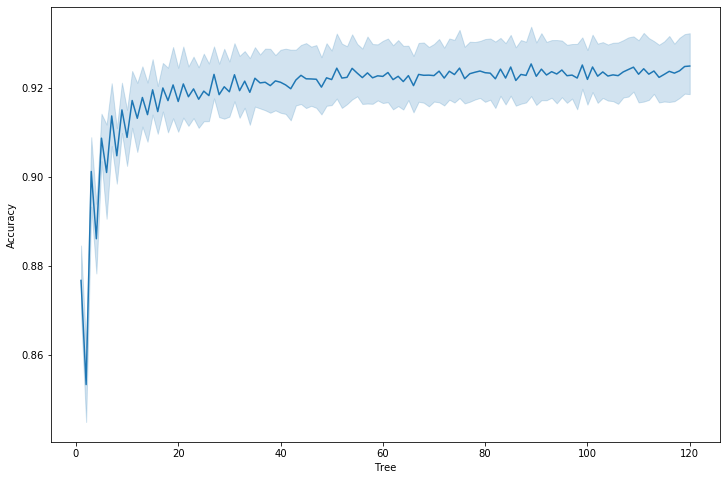

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(data = grid_acc[grid_acc['In_Bands']=='Spectrum_Normalize_Fourier_Terrain_Meterology'],
             x='Tree',
             y='Accuracy')

##### Observe that the Fourier bands significant increases the accuracy

In [8]:
# get the accuracy with the tree number of 100
Acc_tree_100 = grid_acc[grid_acc['Tree'] == 100]

In [9]:
Acc_tree_100

,Year,In_Bands,Tree,Accuracy
99,1990_1992,Spectrum,100,0.891538
219,1990_1992,Spectrum_Normalize,100,0.901669
339,1990_1992,Spectrum_Normalize_Fourier,100,0.913588
459,1990_1992,Spectrum_Normalize_Fourier_Terrain,100,0.914779
579,1990_1992,Spectrum_Normalize_Fourier_Terrain_Meterology,100,0.915971
699,1993_1995,Spectrum,100,0.896789
819,1993_1995,Spectrum_Normalize,100,0.911124
939,1993_1995,Spectrum_Normalize_Fourier,100,0.918578
1059,1993_1995,Spectrum_Normalize_Fourier_Terrain,100,0.920872
1179,1993_1995,Spectrum_Normalize_Fourier_Terrain_Meterology,100,0.913991


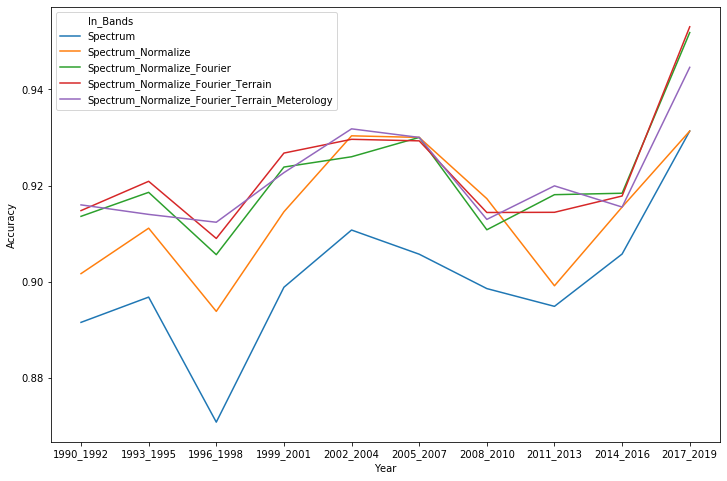

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data = Acc_tree_100,
             x='Year',
             y='Accuracy',
             hue = 'In_Bands')

##### Just for fun: Use ANN(tf) to construct to classification moedl

In [11]:
# get one df for trying
fe = feature_df[-1]

# get the X and y
X = fe.drop('Built',1)
y = fe['Built']

# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# reshape the y values 
y_train = y_train.values.reshape([-1,1])
y_test = y_test.values.reshape([-1,1])

In [13]:
# scale the X values 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [14]:
# construct the ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [15]:
# built layers 
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='adam',loss = 'binary_crossentropy')

In [16]:
# fit the model with X and y
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))

Train on 4598 samples, validate on 2265 samples
Epoch 1/100
4598/4598 [==============================] - 1s 214us/sample - loss: 0.6899 - val_loss: 0.6860
Epoch 2/100
4598/4598 [==============================] - 0s 52us/sample - loss: 0.6853 - val_loss: 0.6818
Epoch 3/100
4598/4598 [==============================] - 0s 64us/sample - loss: 0.6828 - val_loss: 0.6794
Epoch 4/100
4598/4598 [==============================] - 0s 53us/sample - loss: 0.6816 - val_loss: 0.6780
Epoch 5/100
4598/4598 [==============================] - 0s 46us/sample - loss: 0.6809 - val_loss: 0.6772
Epoch 6/100
4598/4598 [==============================] - 0s 57us/sample - loss: 0.6806 - val_loss: 0.6768
Epoch 7/100
4598/4598 [==============================] - 0s 45us/sample - loss: 0.6805 - val_loss: 0.6765
Epoch 8/100
4598/4598 [==============================] - 0s 64us/sample - loss: 0.6805 - val_loss: 0.6764
Epoch 9/100
4598/4598 [==============================] - 0s 46us/sample - loss: 0.6804 - val_loss: 0.67

Epoch 77/100
4598/4598 [==============================] - 0s 79us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 78/100
4598/4598 [==============================] - 0s 58us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 79/100
4598/4598 [==============================] - 0s 44us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 80/100
4598/4598 [==============================] - 0s 83us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 81/100
4598/4598 [==============================] - 0s 50us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 82/100
4598/4598 [==============================] - 0s 72us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 83/100
4598/4598 [==============================] - 0s 60us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 84/100
4598/4598 [==============================] - 0s 46us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 85/100
4598/4598 [==============================] - 0s 86us/sample - loss: 0.6804 - val_loss: 0.6761
Epoch 86/100
4598/4598 [=============

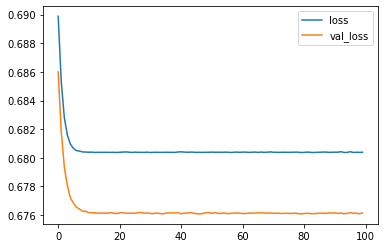

In [17]:
# plot the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
# let's see the performance of the modle
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict_classes(X_test)

In [19]:
# print the classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1343
           1       0.00      0.00      0.00       922

    accuracy                           0.59      2265
   macro avg       0.30      0.50      0.37      2265
weighted avg       0.35      0.59      0.44      2265



C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# print the confusin matrix
print(confusion_matrix(y_test,pred))

[[1343    0]
 [ 922    0]]
